In [1]:
import ROOT
import my_library.common_analysis_tools as ct
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts

Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()

In [3]:
def get_reduced_2d_chi2_hists(df_pipkmks, df_pimkpks, particle):
    particles = {
        'pion': ('pip1', 'pim1'),
        'kaon': ('km', 'kp'),
        'proton': ('p', 'p')
    }

    hist_pipkmks_track = df_pipkmks.Define(f'{particles[particle][0]}_chi2ndf_trk', f'{particles[particle][0]}_chisq_trk/{particles[particle][0]}_ndf_trk') \
        .Histo2D((f'pipkmks_{particles[particle][0]}_chi2ndf_trk', 'Track #Chi^{2}/ndf vs M(K^{-}K_{s}#pi^{+}) for ' + particles[particle][0], 40, 1.1, 1.5, 200, 0.0, 20.0), 'pipkmks_m',  f'{particles[particle][0]}_chi2ndf_trk')
    hist_pimkpks_track = df_pimkpks.Define(f'{particles[particle][1]}_chi2ndf_trk', f'{particles[particle][1]}_chisq_trk/{particles[particle][1]}_ndf_trk') \
        .Histo2D((f'pimkpks_{particles[particle][1]}_chi2ndf_trk', 'Track #Chi^{2}/ndf vs M(#pi^{-}K_{s}K^{+}) for ' + particles[particle][1], 40, 1.1, 1.5, 200, 0.0, 20.0), 'pimkpks_m',  f'{particles[particle][1]}_chi2ndf_trk')
    hist_pipkmks_time = df_pipkmks.Define(f'{particles[particle][0]}_chi2ndf_time', f'{particles[particle][0]}_chisq_time/{particles[particle][0]}_ndf_time') \
        .Histo2D((f'pipkmks_{particles[particle][0]}_chi2ndf_trk', 'Time #Chi^{2}/ndf vs M(K^{-}K_{s}#pi^{+}) for ' + particles[particle][0], 40, 1.1, 1.5, 200, 0.0, 20.0),  'pipkmks_m', f'{particles[particle][0]}_chi2ndf_time')    
    hist_pimkpks_time = df_pimkpks.Define(f'{particles[particle][1]}_chi2ndf_time', f'{particles[particle][1]}_chisq_time/{particles[particle][1]}_ndf_time') \
        .Histo2D((f'pimkpks_{particles[particle][1]}_chi2ndf_trk', 'Time #Chi^{2}/ndf vs M(#pi^{-}K_{s}K^{+}) for ' + particles[particle][1], 40, 1.1, 1.5, 200, 0.0, 20.0),  'pimkpks_m', f'{particles[particle][1]}_chi2ndf_time')
    
    return hist_pipkmks_track, hist_pimkpks_track, hist_pipkmks_time, hist_pimkpks_time

    
def get_reduced_1d_chi2_hists(df_pipkmks, df_pimkpks, particle):
    particles = {
        'pion': ('pip1', 'pim1'),
        'kaon': ('km', 'kp'),
        'proton': ('p', 'p')
    }

    hist_pipkmks_track = df_pipkmks.Define(f'{particles[particle][0]}_chi2ndf_trk', f'{particles[particle][0]}_chisq_trk/{particles[particle][0]}_ndf_trk') \
        .Histo1D((f'pipkmks_{particles[particle][0]}_chi2ndf_trk', 'Track #Chi^{2}/ndf vs M(K^{-}K_{s}#pi^{+}) for ' + particles[particle][0], 200, 0.0, 8.0), f'{particles[particle][0]}_chi2ndf_trk')
    hist_pimkpks_track = df_pimkpks.Define(f'{particles[particle][1]}_chi2ndf_trk', f'{particles[particle][1]}_chisq_trk/{particles[particle][1]}_ndf_trk') \
        .Histo1D((f'pimkpks_{particles[particle][1]}_chi2ndf_trk', 'Track #Chi^{2}/ndf vs M(#pi^{-}K_{s}K^{+}) for ' + particles[particle][1], 200, 0.0, 8.0), f'{particles[particle][1]}_chi2ndf_trk')
    hist_pipkmks_time = df_pipkmks.Define(f'{particles[particle][0]}_chi2ndf_time', f'{particles[particle][0]}_chisq_time/{particles[particle][0]}_ndf_time') \
        .Histo1D((f'pipkmks_{particles[particle][0]}_chi2ndf_trk', 'Time #Chi^{2}/ndf vs M(K^{-}K_{s}#pi^{+}) for ' + particles[particle][0], 200, 0.0, 8.0), f'{particles[particle][0]}_chi2ndf_time')    
    hist_pimkpks_time = df_pimkpks.Define(f'{particles[particle][1]}_chi2ndf_time', f'{particles[particle][1]}_chisq_time/{particles[particle][1]}_ndf_time') \
        .Histo1D((f'pimkpks_{particles[particle][1]}_chi2ndf_trk', 'Time #Chi^{2}/ndf vs M(#pi^{-}K_{s}K^{+}) for ' + particles[particle][1], 200, 0.0, 8.0), f'{particles[particle][1]}_chi2ndf_time')

    hist_pipkmks_track.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
    hist_pipkmks_time.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
    hist_pimkpks_track.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
    hist_pimkpks_time.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))

    return hist_pipkmks_track, hist_pimkpks_track, hist_pipkmks_time, hist_pimkpks_time

In [4]:
run_period = 'spring'
data_type = 'data'

df_pipkmks = ct.get_dataframe('pipkmks', run_period, data_type, filtered=False)
df_pimkpks = ct.get_dataframe('pimkpks', run_period, data_type, filtered=False)


In [5]:
columns = df_pipkmks.GetColumnNames()

In [6]:
longest = 0
for column in columns: 
    if len(column)>longest: longest = len(column)

for i, column in enumerate(columns):
    line = ''
    if (i+1)%5!=0:
        end = ' '*(longest-len(column)+1) + '| '
    else:
        end = '\n'
    print(column, end=end)

chi2ndf             | p_pt                | p_p                 | ks_px               | ks_py
ks_pz               | ks_E                | ks_m                | ks_px_measured      | ks_py_measured
ks_pz_measured      | ks_E_measured       | ks_m_measured       | mxpx_ppipkmks       | mxpy_ppipkmks
mxpz_ppipkmks       | mxe_ppipkmks        | mx2_ppipkmks        | ppip_px             | ppip_py
ppip_pz             | ppip_E              | ppip_m              | missing_px          | missing_py
missing_pz          | missing_E           | missing_m           | kmp_px              | kmp_py
kmp_pz              | kmp_E               | kmp_m               | ksp_px              | ksp_py
ksp_pz              | ksp_E               | ksp_m               | kspip_px            | kspip_py
kspip_pz            | kspip_E             | kspip_m             | kmpip_px            | kmpip_py
kmpip_pz            | kmpip_E             | kmpip_m             | pipkmks_px          | pipkmks_py
pipkmks_pz          | p

In [7]:
max_chi2 = 12

In [8]:
df_pipkmks = df_pipkmks.Filter(f'chi2ndf < {max_chi2}').Filter(kcuts.BEAM_RANGE).Filter(kcuts.T_RANGE).Filter(kcuts.KS_PATHLENGTH_CUT).Filter(kcuts.KS_MASS_CUT).Filter(kcuts.P_P_CUT).Filter(kcuts.MX2_PPIPKMKS_CUT).Filter(kcuts.PPIP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS)
df_pimkpks = df_pimkpks.Filter(f'chi2ndf < {max_chi2}').Filter(kcuts.BEAM_RANGE).Filter(kcuts.T_RANGE).Filter(kcuts.KS_PATHLENGTH_CUT).Filter(kcuts.KS_MASS_CUT).Filter(kcuts.P_P_CUT).Filter(kcuts.MX2_PPIMKPKS_CUT).Filter(kcuts.PPIM_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS)

In [9]:
hist_2d_chi2ndf_pipkmks = df_pipkmks.Histo2D(('hist_2d_chi2ndf_pipkmks', f'#Chi^{2}/ndf vs M(KK#pi)', 50, 1.1, 1.6, 200, 0.0, 20.0), 'pipkmks_m', 'chi2ndf')
hist_1d_chi2ndf_pipkmks = df_pipkmks.Histo1D(('hist_1d_chi2ndf_pipkmks', f'#Chi^{2}/ndf vs M(KK#pi)', 200, 0.0, 20.0), 'chi2ndf')
hist_1d_chi2ndf_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_2d_chi2ndf_pimkpks = df_pimkpks.Histo2D(('hist_2d_chi2ndf_pimkpks', f'#Chi^{2}/ndf vs M(#piKK)', 50, 1.1, 1.6, 200, 0.0, 20.0), 'pimkpks_m', 'chi2ndf')
hist_1d_chi2ndf_pimkpks = df_pimkpks.Histo1D(('hist_1d_chi2ndf_pimkpks', f'#Chi^{2}/ndf vs M(#piKK)', 200, 0.0, 20.0), 'chi2ndf')
hist_1d_chi2ndf_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))

In [10]:
c1 = ROOT.TCanvas('c1', 'c1', 800, 600)
c1.Divide(3,1)

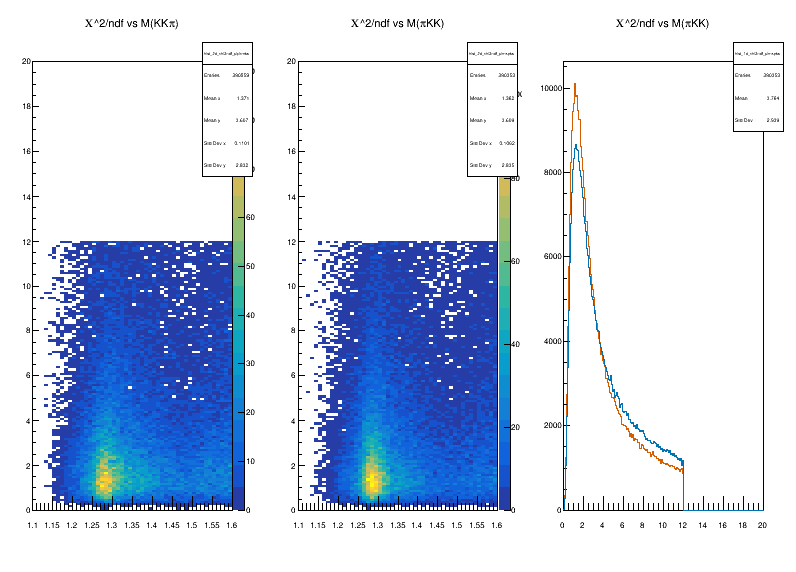

In [11]:
c1.cd(1)
hist_2d_chi2ndf_pipkmks.Draw('colz')
c1.cd(2)
hist_2d_chi2ndf_pimkpks.Draw('colz')
c1.cd(3)
hist_1d_chi2ndf_pimkpks.Draw()
hist_1d_chi2ndf_pipkmks.Draw('same')
c1.Draw()

In [12]:
hist_pipkmks_pion_track, hist_pimkpks_pion_track, hist_pipkmks_pion_time, hist_pimkpks_pion_time = get_reduced_2d_chi2_hists(df_pipkmks, df_pimkpks, 'pion')
hist_pipkmks_kaon_track, hist_pimkpks_kaon_track, hist_pipkmks_kaon_time, hist_pimkpks_kaon_time = get_reduced_2d_chi2_hists(df_pipkmks, df_pimkpks, 'kaon')
hist_pipkmks_proton_track, hist_pimkpks_proton_track, hist_pipkmks_proton_time, hist_pimkpks_proton_time = get_reduced_2d_chi2_hists(df_pipkmks, df_pimkpks, 'proton')

hist_pipkmks_pion_track_1d, hist_pimkpks_pion_track_1d, hist_pipkmks_pion_time_1d, hist_pimkpks_pion_time_1d = get_reduced_1d_chi2_hists(df_pipkmks, df_pimkpks, 'pion')
hist_pipkmks_kaon_track_1d, hist_pimkpks_kaon_track_1d, hist_pipkmks_kaon_time_1d, hist_pimkpks_kaon_time_1d = get_reduced_1d_chi2_hists(df_pipkmks, df_pimkpks, 'kaon')
hist_pipkmks_proton_track_1d, hist_pimkpks_proton_track_1d, hist_pipkmks_proton_time_1d, hist_pimkpks_proton_time_1d = get_reduced_1d_chi2_hists(df_pipkmks, df_pimkpks, 'proton')

In [13]:
c2 = ROOT.TCanvas('c2', 'c2', 800, 600)
c2.Divide(2,2)
c3 = ROOT.TCanvas('c3', 'c3', 800, 600)
c3.Divide(2,1)

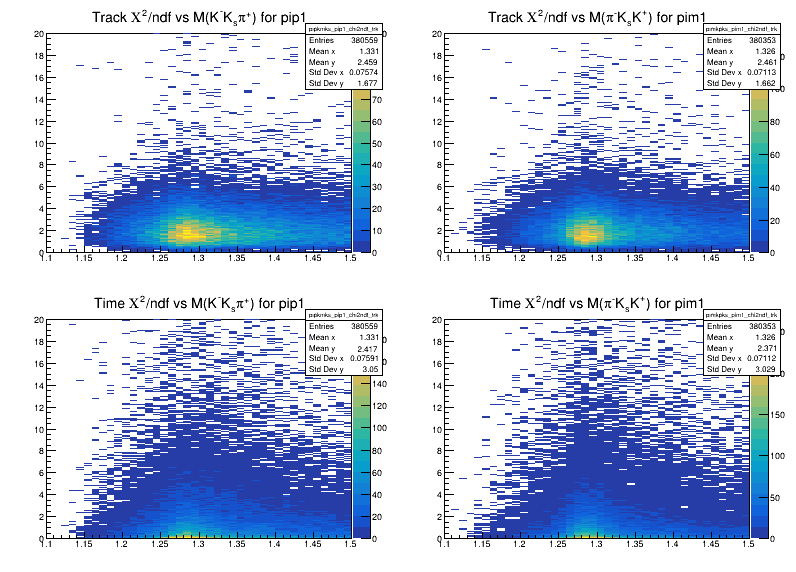

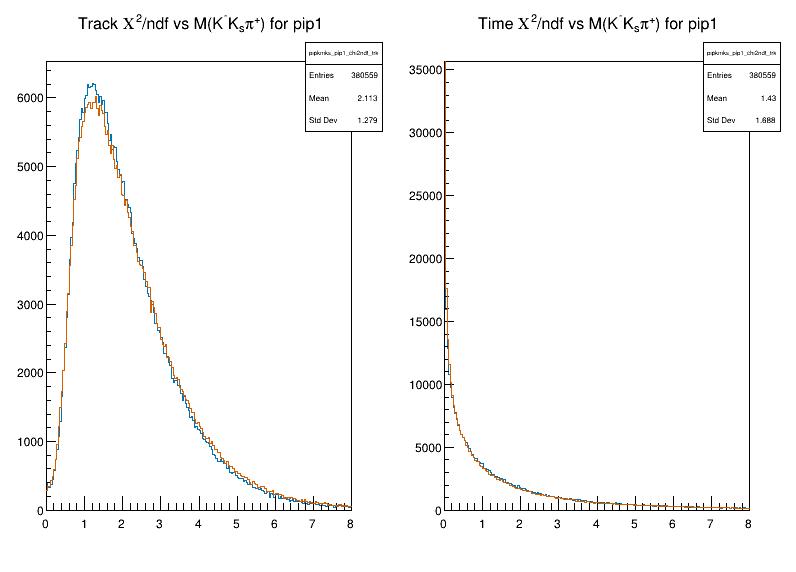

In [14]:
c2.cd(1)
hist_pipkmks_pion_track.Draw('colz')
c2.cd(2)
hist_pimkpks_pion_track.Draw('colz')
c2.cd(3)
hist_pipkmks_pion_time.Draw('colz')
c2.cd(4)
hist_pimkpks_pion_time.Draw('colz')
c2.Draw()
c3.cd(1)
hist_pipkmks_pion_track_1d.Draw()
hist_pimkpks_pion_track_1d.Draw('same')
c3.cd(2)
hist_pipkmks_pion_time_1d.Draw()
hist_pimkpks_pion_time_1d.Draw('same')
c3.Draw()


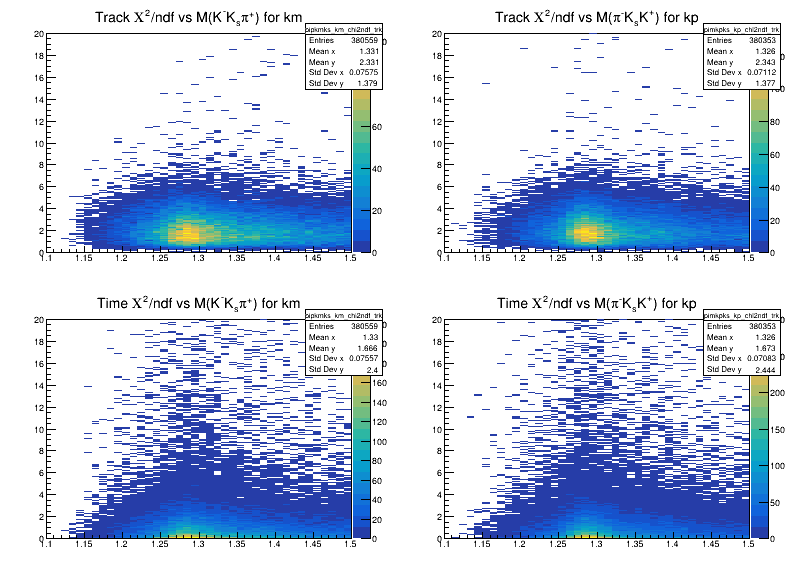

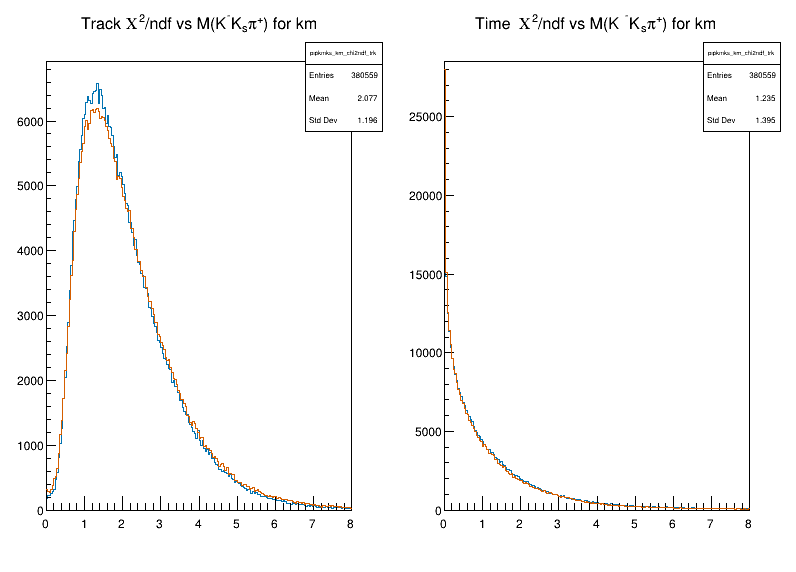

In [15]:
c2.cd(1)
hist_pipkmks_kaon_track.Draw('colz')
c2.cd(2)
hist_pimkpks_kaon_track.Draw('colz')
c2.cd(3)
hist_pipkmks_kaon_time.Draw('colz')
c2.cd(4)
hist_pimkpks_kaon_time.Draw('colz')
c2.Draw()
c3.cd(1)
hist_pipkmks_kaon_track_1d.Draw()
hist_pimkpks_kaon_track_1d.Draw('same')
c3.cd(2)
hist_pipkmks_kaon_time_1d.Draw()
hist_pimkpks_kaon_time_1d.Draw('same')
c3.Draw()

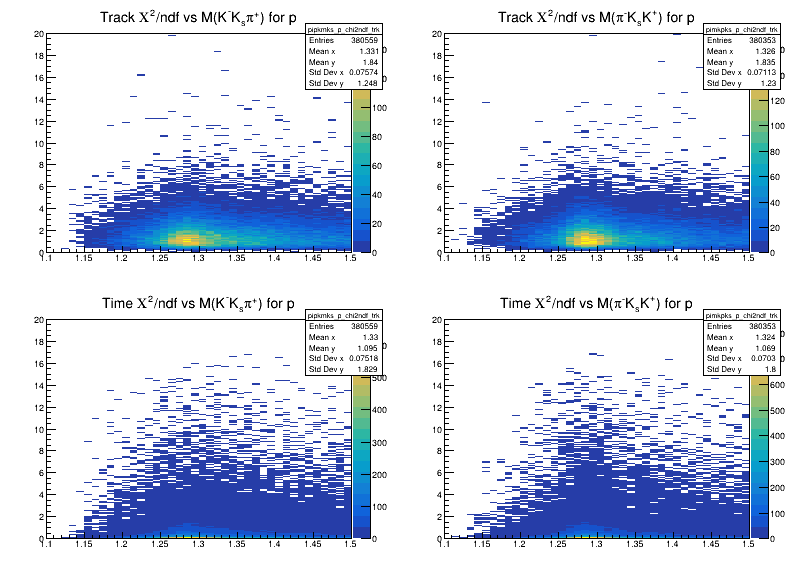

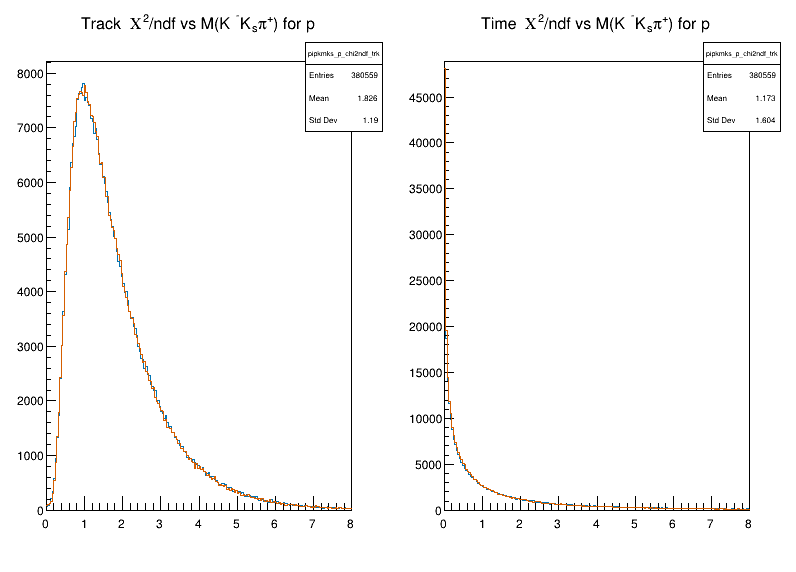

In [16]:
c2.cd(1)
hist_pipkmks_proton_track.Draw('colz')
c2.cd(2)
hist_pimkpks_proton_track.Draw('colz')
c2.cd(3)
hist_pipkmks_proton_time.Draw('colz')
c2.cd(4)
hist_pimkpks_proton_time.Draw('colz')
c2.Draw()
c3.cd(1)
hist_pipkmks_proton_track_1d.Draw()
hist_pimkpks_proton_track_1d.Draw('same')
c3.cd(2)
hist_pipkmks_proton_time_1d.Draw()
hist_pimkpks_proton_time_1d.Draw('same')
c3.Draw()

In [17]:
hist_pipkmks_chi2_3 = df_pipkmks.Filter('chi2ndf < 3').Histo1D(('hist_pipkmks_chi2_3', 'M(K^{-}K_{s}#pi^{+}) for #Chi^{2}/ndf < 3', 50, 1.1, 1.6), 'pipkmks_m')
hist_pipkmks_chi2_3.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_pipkmks_chi2_5 = df_pipkmks.Filter('chi2ndf < 5').Histo1D(('hist_pipkmks_chi2_5', 'M(K^{-}K_{s}#pi^{+}) for #Chi^{2}/ndf < 5', 50, 1.1, 1.6), 'pipkmks_m')
hist_pipkmks_chi2_5.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['green']))
hist_pipkmks_chi2_8_12 = df_pipkmks.Filter('chi2ndf < 12 && chi2ndf > 8').Histo1D(('hist_pipkmks_chi2_8_12', 'M(K^{-}K_{s}#pi^{+}) for 8 < #Chi^{2}/ndf < 12', 50, 1.1, 1.6), 'pipkmks_m')
hist_pipkmks_chi2_8_12.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))

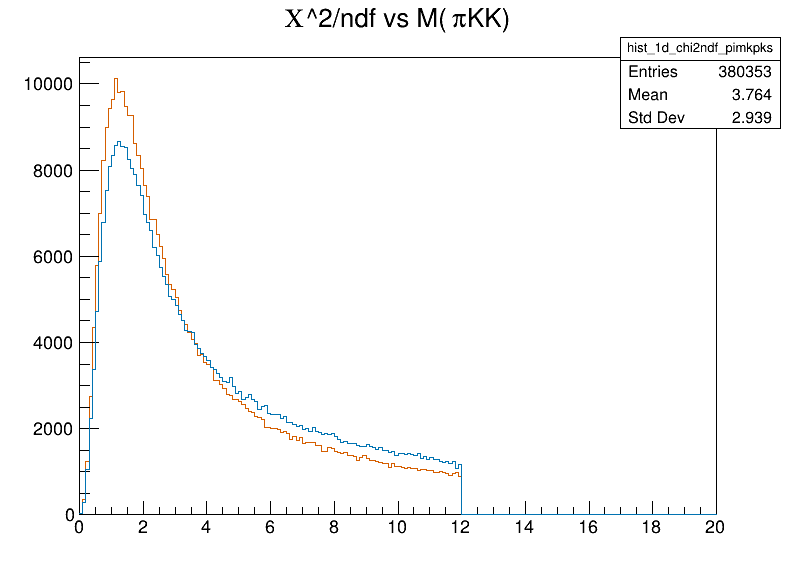

In [18]:
c4 = ROOT.TCanvas('c4', 'c4', 800, 600)
hist_1d_chi2ndf_pimkpks.Draw()
hist_1d_chi2ndf_pipkmks.Draw('same')
c4.Draw()

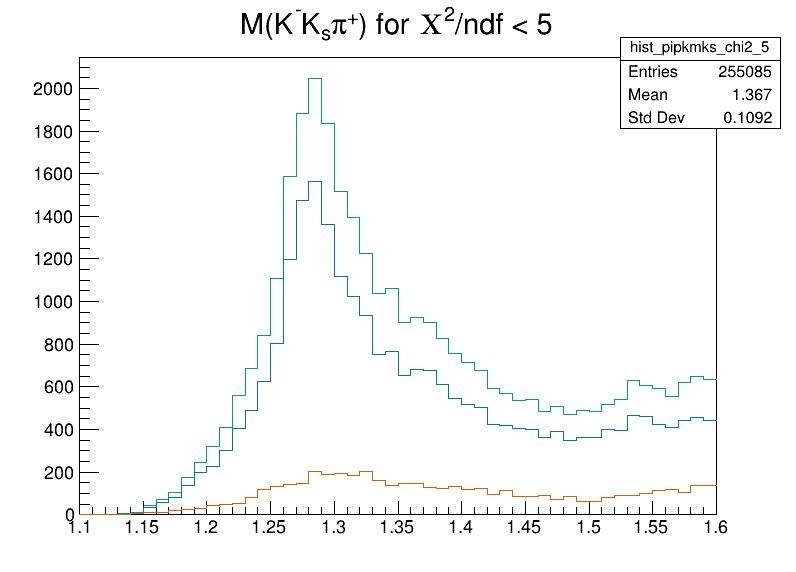

In [19]:
c5 = ROOT.TCanvas('c5', 'c5', 800, 600)
hist_pipkmks_chi2_5.Draw()
hist_pipkmks_chi2_3.Draw('same')
hist_pipkmks_chi2_8_12.Draw('same')
c5.Draw()



In [20]:
hist_pimkpks_chi2_3 = df_pimkpks.Filter('chi2ndf < 3').Histo1D(('hist_pimkpks_chi2_3', 'M(K^{+}K_{s}#pi^{-}) for #Chi^{2}/ndf < 3', 50, 1.1, 1.6), 'pimkpks_m')
hist_pimkpks_chi2_3.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_pimkpks_chi2_5 = df_pimkpks.Filter('chi2ndf < 5').Histo1D(('hist_pimkpks_chi2_5', 'M(K^{+}K_{s}#pi^{-}) for #Chi^{2}/ndf < 5', 50, 1.1, 1.6), 'pimkpks_m')
hist_pimkpks_chi2_5.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['green']))
hist_pimkpks_chi2_8_12 = df_pimkpks.Filter('chi2ndf < 12 && chi2ndf > 8').Histo1D(('hist_pimkpks_chi2_8_12', 'M(K^{+}K_{s}#pi^{-}) for 8 < #Chi^{2}/ndf < 12', 50, 1.1, 1.6), 'pimkpks_m')
hist_pimkpks_chi2_8_12.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))

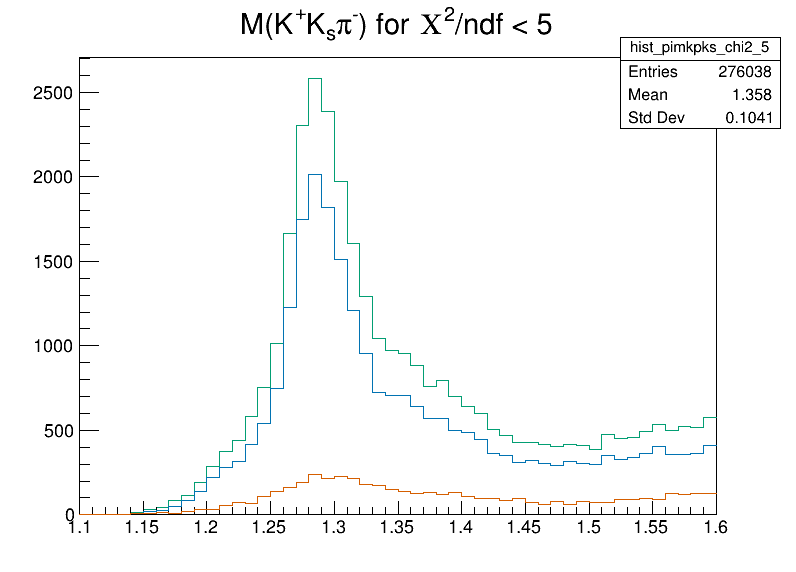

In [21]:
hist_pimkpks_chi2_5.Draw()
hist_pimkpks_chi2_3.Draw('same')
hist_pimkpks_chi2_8_12.Draw('same')
c5.Draw()

In [31]:
hist_pimkpks_chi2_3.SetLineColor(ROOT.TColor.GetColor(constants.TWELVE_COLORBLIND_HEX_DICT['blue']))
hist_pimkpks_chi2_5.SetLineColor(ROOT.TColor.GetColor(constants.TWELVE_COLORBLIND_HEX_DICT['aqua']))
hist_pimkpks_chi2_8_12.SetLineColor(ROOT.TColor.GetColor(constants.TWELVE_COLORBLIND_HEX_DICT['red']))

In [32]:
legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
legend.AddEntry(hist_pipkmks_chi2_3.GetValue(), '#pi^{+}K^{-} #Chi^{2}/ndf < 3', 'l')
legend.AddEntry(hist_pipkmks_chi2_5.GetValue(), '#pi^{+}K^{-} #Chi^{2}/ndf < 5', 'l')
legend.AddEntry(hist_pipkmks_chi2_8_12.GetValue(), '#pi^{+}K^{-} 8 < #Chi^{2}/ndf < 12', 'l')
legend.AddEntry(hist_pimkpks_chi2_3.GetValue(), '#pi^{-}K^{+} #Chi^{2}/ndf < 3', 'l')
legend.AddEntry(hist_pimkpks_chi2_5.GetValue(), '#pi^{-}K^{+} #Chi^{2}/ndf < 5', 'l')
legend.AddEntry(hist_pimkpks_chi2_8_12.GetValue(), '#pi^{-}K^{+} 8 < #Chi^{2}/ndf < 12', 'l')


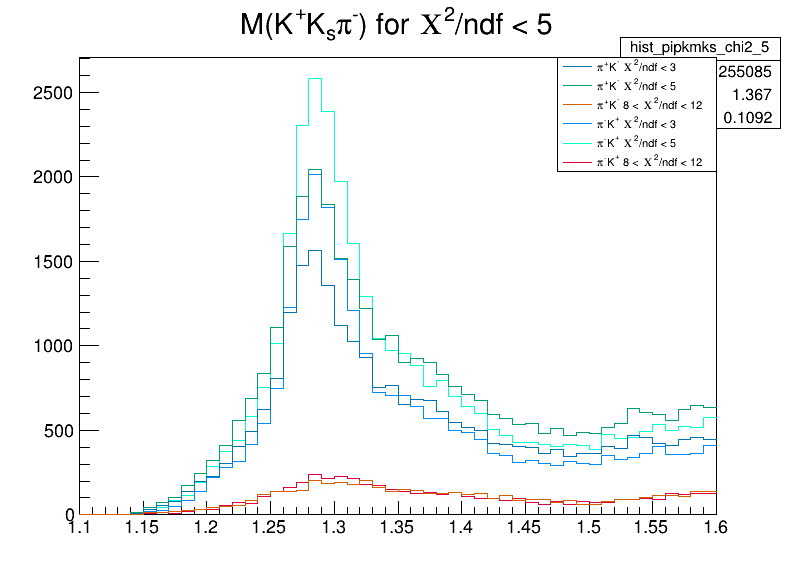

In [33]:
hist_pimkpks_chi2_5.Draw()
hist_pimkpks_chi2_3.Draw('same')
hist_pimkpks_chi2_8_12.Draw('same')
hist_pipkmks_chi2_5.Draw('same')
hist_pipkmks_chi2_3.Draw('same')
hist_pipkmks_chi2_8_12.Draw('same')
legend.Draw()
c5.Draw()